## backtest crypto using fastquant

In [ ]:
import quandl

data = quandl.get("BCHARTS/BITSTAMPUSD")
data.tail()

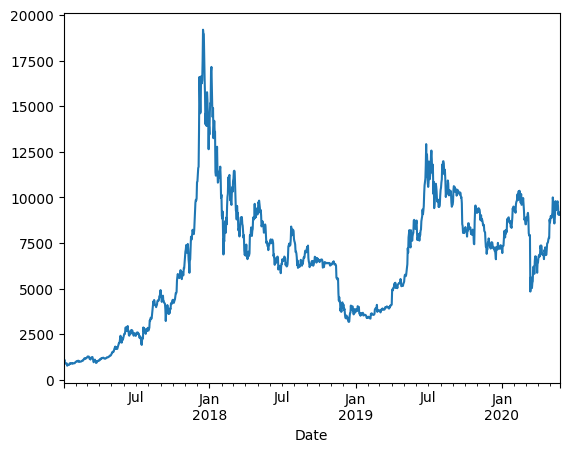

In [5]:
date_filter = data.index>"2017-01-01"
data[date_filter].Close.plot()

In [10]:
df = data.loc[date_filter, ["Close", "Volume (BTC)"]].reset_index()
df = df.rename(columns={
    "Date":"dt",
    "Close":"close",
    "Volume (BTC)": "volume"
})
df.head()

,dt,close,volume
0,2017-01-02,1012.54,8167.381030
1,2017-01-03,1035.24,9089.658025
2,2017-01-04,1114.92,21562.456972
3,2017-01-05,1004.74,36018.861120
4,2017-01-06,893.89,27916.703099


In [9]:
import matplotlib as mpl
mpl.style.use("default")

In [ ]:
from fastquant import backtest

results = backtest('smac', 
                   df, 
                   fast_period=[7,14,21,28], 
                   slow_period=[30,45,60,75],
                   plot=False,
                   verbose=False
                  )

In [16]:
results.head()

,init_cash,buy_prop,sell_prop,execution_type,fast_period,slow_period,rtot,ravg,rnorm,rnorm100,sharperatio,pnl,final_value
0,100000,1,1,close,7,75,2.652549,0.002141,0.715152,71.515155,0.669766,1319015.99,1.419016e+06
1,100000,1,1,close,14,30,2.551825,0.002060,0.680372,68.037195,0.646755,1183049.25,1.283049e+06
2,100000,1,1,close,14,45,2.380103,0.001921,0.622695,62.269549,0.621362,980601.08,1.080601e+06
3,100000,1,1,close,14,75,2.354119,0.001900,0.614142,61.414236,0.616956,952884.38,1.052884e+06
4,100000,1,1,close,21,30,2.277490,0.001838,0.589180,58.918028,0.600834,875217.31,9.752173e+05


In [20]:
#get best parameters on top row 
fast_best, slow_best = results.iloc[0][["fast_period","slow_period"]]
fast_best, slow_best

(7, 75)

===Global level arguments===
init_cash : 100000
buy_prop : 1
sell_prop : 1
===Strategy level arguments===
fast_period : 7
slow_period : 75
Final PnL: 1319015.99
Time used (seconds): 0.2126755714416504
Optimal parameters: {'init_cash': 100000, 'buy_prop': 1, 'sell_prop': 1, 'execution_type': 'close', 'fast_period': 7, 'slow_period': 75}
Optimal metrics: {'rtot': 2.652548760999214, 'ravg': 0.0021408787417265653, 'rnorm': 0.7151515480351507, 'rnorm100': 71.51515480351507, 'sharperatio': 0.6697660352355762, 'pnl': 1319015.99, 'final_value': 1419015.9919749994}


<IPython.core.display.Javascript object>


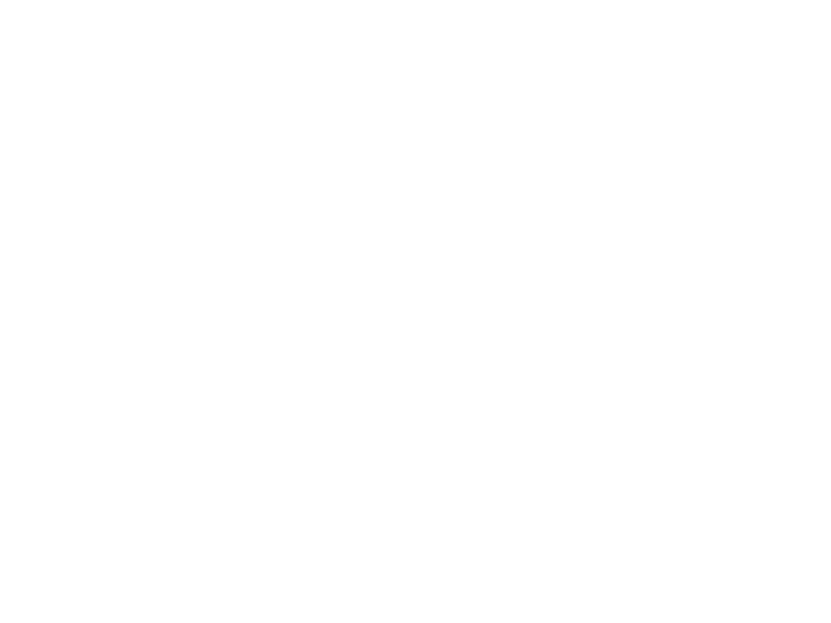

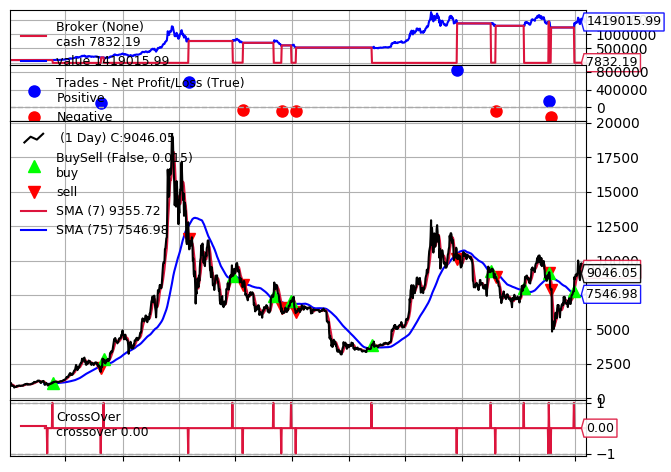

In [19]:
results = backtest('smac', 
                   df, 
                   fast_period=fast_best, 
                   slow_period=slow_best,
                   plot=True,
                   verbose=False
                  )